In [2]:
# Read uspto dataset
import pandas as pd
import numpy as np
import nltk


df = pd.read_csv('./dataset/df-claim-A.csv')
df_claim=df[["ID","Title","Claim","cpc_subclass"]]
df_claim= df_claim.dropna()
df_claim = df_claim.reset_index(drop=True)
df_claim.head()

,ID,Title,Claim,cpc_subclass
0,8927300,Method and compositions for the detection of p...,1. A compound of the formula: wherein R is a s...,"C07H,C07K,C12N,C12Q,G01N"
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
3,8925531,Spark plug degradation detection,1. A method of controlling an engine cylinder ...,"F02D,F02P,Y02T"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"


In [3]:
len(df_claim)

1428600

In [4]:
df_claim_uspto = df_claim_uspto = df_claim[df_claim['cpc_subclass'].str.contains(r'\bH[\w]*|,[\s]*H[\w]*')]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
1,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
2,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
4,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
6,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
7,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [5]:
#df_claim=df_claim[["grant_id","patent_title","claims_text","abstract", "main_classification"]]
df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()
df_claim_uspto = df_claim_uspto.reset_index(drop=True)
df_claim_uspto.head()

C:\Users\admin\AppData\Local\Temp/ipykernel_16904/1681520836.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_claim_uspto["Claim"]= df_claim_uspto["Claim"].dropna()


,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


In [6]:
df_claim_uspto=df_claim_uspto[:60000]
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N"
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K"
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L"
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N"
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L"


# preprocessing

In [7]:
def cleantext(df_claim_uspto): 
    
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['Claim'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].str.lower()
    
    #remove numbers
    df_claim_uspto['cleaned_claims_text'] =df_claim_uspto['cleaned_claims_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    df_claim_uspto['cleaned_claims_text']  = df_claim_uspto['cleaned_claims_text'].replace(r'https.*$', "", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("   ", " ", regex = True)
    df_claim_uspto['cleaned_claims_text'] = df_claim_uspto['cleaned_claims_text'].replace("  ", " ", regex = True)
   
    return df_claim_uspto

df_claim_uspto = cleantext(df_claim_uspto)
df_claim_uspto.head()

C:\Users\admin\AppData\Roaming\Python\Python39\site-packages\pandas\core\dtypes\inference.py:181: FutureWarning: Possible nested set at position 1
  re.compile(obj)


,ID,Title,Claim,cpc_subclass,cleaned_claims_text
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...


In [8]:
import nltk
from nltk.corpus import stopwords

# Load the stop words
nltk.download('stopwords')
english_stop_words = set(stopwords.words('english'))

# Define a set of patent-specific stop words
patent_stop_words = set(["invention", "apparatus", "method", "system", "device",
                         "means", "comprising", "having", "including", "wherein",
                         "according", "configured", "configured to", "configured for",
                         "one or more", "plurality", "at least", "said", "and/or",
                         "thereof", "thereto", "herein", "hereby", "hereof", "hereunder",
                         "hereto", "herewith", "respectively", "corresponding",
                         "respectively corresponding", "substantially", "generally",
                         "typically", "usually", "often", "frequently", "commonly",
                         "normally", "conventional", "traditional", "known", "prior",
                         "art", "field", "related", "disclosed", "described", "illustrated",
                         "embodiment", "example", "figure", "graph", "chart", "data",
                         "information", "section", "portion", "aspect", "aspect of",
                         "part", "feature", "detail", "particular", "certain", "some",
                         "many", "various", "multiple", "different", "differentiate",
                         "similar", "corresponding", "correspondingly", "also",
                         "in addition", "furthermore", "moreover", "additionally",
                         "especially", "particular", "particularity", "specific",
                         "specifically", "example", "exemplary", "illustrative",
                         "such as", "include", "includes", "including", "included",
                         "contain", "contains", "containing", "contained", "shown"])

# Merge the sets of stop words
stop_words = english_stop_words.union(patent_stop_words)

df_claim_uspto['cleaned_claim_text_without_Stopwprd'] = df_claim_uspto['cleaned_claims_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stop_words]))
df_claim_uspto.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...


In [9]:
# Import the necessary library
from nltk.stem import WordNetLemmatizer

# Create an instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to lemmatize each word in a given text
def lemmatize_words(text):
    # Split the text into individual words
    words = text.split()
    # Apply lemmatization to each word and join them back into a string
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Apply the lemmatize_words function to the 'cleaned_claim_text_without_Stopwprd' column of the dataframe
df_claim_uspto["Lemmatized-Claim"] = df_claim_uspto["cleaned_claim_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))

# Print the resulting dataframe with the added 'Lemmatized-Cliam' column
df_claim_uspto.head()

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...


In [10]:
#tokenize corpus
nltk.download('punkt')

#tokenize a string into words
def tokenize_text(text):
    tokens = nltk.word_tokenize(text)
    return tokens

# Apply the tokenization function to each row of the 'Lemmatized-Claim' column
df_claim_uspto['Claim_tokens'] = df_claim_uspto["Lemmatized-Claim"].apply(tokenize_text)
df_claim_uspto.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."


# divide the dataset

In [11]:
#Divide the dataset into different size
df_claim_20K=df_claim_uspto[:20000]
df_claim_20K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
19995,8975813,Light emitting device,1. A display device comprising: a first substr...,"H01L,Y10S",a display device comprising a first substrate...,display first substrate first pixel first subs...,display first substrate first pixel first subs...,"[display, first, substrate, first, pixel, firs..."
19996,8975173,Semiconductor device with buried gate and meth...,1. A method for fabricating a semiconductor de...,H01L,a method for fabricating a semiconductor devi...,fabricating semiconductor forming first layer ...,fabricating semiconductor forming first layer ...,"[fabricating, semiconductor, forming, first, l..."
19997,8976859,Processing a video for spatial and temporal ma...,1. A method for increasing a resolution of a v...,"G06T,H04N",a method for increasing a resolution of a vid...,increasing resolution video receiving image fr...,increasing resolution video receiving image fr...,"[increasing, resolution, video, receiving, ima..."
19998,8977244,Extensible phone application,"1. A mobile communication device, comprising: ...",H04M,a mobile communication device comprising a me...,mobile communication memory encoded computerex...,mobile communication memory encoded computerex...,"[mobile, communication, memory, encoded, compu..."


In [28]:
df_claim_30K=df_claim_uspto[:30000]
df_claim_30K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
29995,9008081,Serving gateway proxies for non-SIP speakers i...,1. In a communication network in which Session...,H04L,in a communication network in which session i...,communication network session initiation proto...,communication network session initiation proto...,"[communication, network, session, initiation, ..."
29996,9004937,Surface mount/through-hole crimp piercing zipc...,1. A through-the-hole (TTH)/surface mount (SMT...,"H01R,Y10T",a throughthehole tthsurface mount smt insulat...,throughthehole tthsurface mount smt insulation...,throughthehole tthsurface mount smt insulation...,"[throughthehole, tthsurface, mount, smt, insul..."
29997,9008606,Method for requesting emergency service at mob...,1. A communication method by a mobile station ...,H04W,a communication method by a mobile station in...,communication mobile station mobile communicat...,communication mobile station mobile communicat...,"[communication, mobile, station, mobile, commu..."
29998,9007145,High-frequency signal balancing multiplexer,1. A high-frequency module comprising: a frequ...,H03H,a highfrequency module comprising a frequency...,highfrequency module frequency selector provid...,highfrequency module frequency selector provid...,"[highfrequency, module, frequency, selector, p..."


In [29]:
df_claim_50K=df_claim_uspto[:50000]
df_claim_50K

,ID,Title,Claim,cpc_subclass,cleaned_claims_text,cleaned_claim_text_without_Stopwprd,Lemmatized-Claim,Claim_tokens
0,8930992,TV social network advertising,"1. An advertising method, comprising: displayi...","G06Q,H04N",an advertising method comprising displaying a...,advertising displaying television program vide...,advertising displaying television program vide...,"[advertising, displaying, television, program,..."
1,8929358,Call flow system and method for use in a legac...,"1. A method, comprising: receiving, from a mob...","H04L,H04M,H04Q,H04W,H05K",a method comprising receiving from a mobile s...,receiving mobile switching network carrier gat...,receiving mobile switching network carrier gat...,"[receiving, mobile, switching, network, carrie..."
2,8927955,Resistance change memory,1. A resistance change memory comprising: a fi...,"B82Y,G11C,H01L",a resistance change memory comprising a first...,resistance change memory first interconnect li...,resistance change memory first interconnect li...,"[resistance, change, memory, first, interconne..."
3,8928653,"Information processing system, information pro...",1. An information processing system comprising...,"A63F,G06F,H04N",an information processing system comprising a...,processing first processing second processing ...,processing first processing second processing ...,"[processing, first, processing, second, proces..."
4,8930595,Memory switch for interconnecting server nodes,1. A computer-implemented method for transferr...,"G06F,H04L",a computerimplemented method for transferring...,computerimplemented transferring electronic de...,computerimplemented transferring electronic de...,"[computerimplemented, transferring, electronic..."
...,...,...,...,...,...,...,...,...
49995,9058053,Virtual reality display system,1. An apparatus comprising: a head tracker con...,"G02B,G06F,H04N",an apparatus comprising a head tracker config...,head tracker track head position head person g...,head tracker track head position head person g...,"[head, tracker, track, head, position, head, p..."
49996,9060428,Coreless multi-layer circuit substrate with mi...,1. A system comprising: a semiconductor chip; ...,"H01L,H05K,Y10T",a system comprising a semiconductor chip and ...,semiconductor chip multilayer interconnecting ...,semiconductor chip multilayer interconnecting ...,"[semiconductor, chip, multilayer, interconnect..."
49997,9059871,Policy-based communication system and method,1. A communication system comprising: a GGSN i...,H04L,a communication system comprising a ggsn incl...,communication ggsn central processing unit net...,communication ggsn central processing unit net...,"[communication, ggsn, central, processing, uni..."
49998,9059383,Hand held breast pump,1. A hand held breast pump system comprising: ...,H01L,a hand held breast pump system comprising a b...,hand held breast pump body diaphragm sealing c...,hand held breast pump body diaphragm sealing c...,"[hand, held, breast, pump, body, diaphragm, se..."


# Bertopic on 20K claim patent- n-neigbaour=50 , n-component=5

In [31]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=50, 
                  n_components=5, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 09:30:56,924 - BERTopic - Transformed documents to Embeddings
2023-03-14 09:31:45,545 - BERTopic - Reduced dimensionality
2023-03-14 09:31:50,410 - BERTopic - Clustered reduced embeddings


In [32]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})

documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] for topic in range(len(set(topics))-1)]


# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_npmi')
coherence_c_nmpi = coherence_model.get_coherence()
print("c_npmi is: ",coherence_c_nmpi)

c_npmi is:  -0.014884785639574113


In [33]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5023002836230234


# Bertopic on 20K claim patent- n-neigbaour=50 , n-component=15

In [35]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=50, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 10:21:48,166 - BERTopic - Transformed documents to Embeddings
2023-03-14 10:22:26,659 - BERTopic - Reduced dimensionality
2023-03-14 10:22:29,454 - BERTopic - Clustered reduced embeddings


In [36]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5078553425110329


# Bertopic on 20K claim patent- n-neigbaour=45 , n-component=15

In [37]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 11:12:25,154 - BERTopic - Transformed documents to Embeddings
2023-03-14 11:12:59,946 - BERTopic - Reduced dimensionality
2023-03-14 11:13:02,777 - BERTopic - Clustered reduced embeddings


In [38]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5062549303516395


In [ ]:
#max_df=0.5

In [39]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 12:10:54,348 - BERTopic - Transformed documents to Embeddings
2023-03-14 12:11:29,267 - BERTopic - Reduced dimensionality
2023-03-14 12:11:32,155 - BERTopic - Clustered reduced embeddings


In [40]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5231920901923311


In [ ]:
#max_df=0.5, n_neighbors=40,

In [41]:
sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=40, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 13:03:52,275 - BERTopic - Transformed documents to Embeddings
2023-03-14 13:04:27,471 - BERTopic - Reduced dimensionality
2023-03-14 13:04:30,540 - BERTopic - Clustered reduced embeddings


In [42]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.522534545077382


In [ ]:
#max_df=0.5, n_neighbors=40,

In [43]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=50, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=10, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-14 14:08:10,382 - BERTopic - Transformed documents to Embeddings
2023-03-14 14:08:46,607 - BERTopic - Reduced dimensionality
2023-03-14 14:08:49,583 - BERTopic - Clustered reduced embeddings


In [44]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4630007593450724


In [1]:
#Hyperparameter Tuning for Document Embeddings

In [ ]:
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
hf_model = pipeline("feature-extraction", model="distilroberta-base")

# flair Document Pool Embeddings
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
document_embeddings = DocumentPoolEmbeddings([glove_embedding])


glove_embedding = WordEmbeddings('glove')

document_embeddings_RNN = DocumentRNNEmbeddings([glove_embedding])

# Initiate BERTopic
topic_model_RNN = BERTopic(embedding_model=document_embeddings_RNN)


# Initiate a pretrained embedding model
roberta_model = TransformerDocumentEmbeddings('roberta-base')


# init embedding
embedding = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')

embedding_model_USE = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

topic_model_USE = BERTopic(embedding_model=embedding_model_USE)

#Gensim
import gensim.downloader as api
ft = api.load('fasttext-wiki-news-subwords-300')

topic_model_G = BERTopic(embedding_model=ft)

#skitlearn 

pipe = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(100)
)
#Word + Document Embeddings

# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')

# Document embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create a model that uses both language models and pass it through BERTopic
word_doc_embedder = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)
topic_model_WD = BERTopic(embedding_model=word_doc_embedder)

In [1]:
##### hyperparameter tuning for the setence embedding

In [12]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
#sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-22 10:03:47,677 - BERTopic - Transformed documents to Embeddings
2023-03-22 10:04:46,034 - BERTopic - Reduced dimensionality
2023-03-22 10:04:48,952 - BERTopic - Clustered reduced embeddings


In [13]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4968459155290778


In [14]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-22 10:27:23,308 - BERTopic - Transformed documents to Embeddings
2023-03-22 10:27:55,090 - BERTopic - Reduced dimensionality
2023-03-22 10:27:58,137 - BERTopic - Clustered reduced embeddings


In [15]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.48337689193953537


In [16]:
#Hugging Face

In [17]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from transformers.pipelines import pipeline

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')
sentence_model = pipeline("feature-extraction", model="distilroberta-base")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Some weights of the model checkpoint at distilroberta-base were not used when initializing RobertaModel: ['lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|████████████████████████████████████████████████████████████████████████████| 20000/20000 [22:02<00:00, 15.12it/s]
2023-03-22 11:21:53,007 - BERTopic - Transformed documents to Embeddings
2023-03-22 11:22:25,550 - BERTopic - Reduced dimensionality
2023-03-22 11:22:28,716 - BERTopic - C

In [18]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.43341260550511485


In [19]:
#flair

In [20]:
# flair Document Pool Embeddings

In [21]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from flair.embeddings import WordEmbeddings, DocumentPoolEmbeddings

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# initialize the word embeddings
glove_embedding = WordEmbeddings('glove')

# initialize the document embeddings, mode = mean
sentence_model = DocumentPoolEmbeddings([glove_embedding])

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

20000it [00:43, 455.92it/s]
2023-03-22 11:45:26,602 - BERTopic - Transformed documents to Embeddings
2023-03-22 11:45:56,288 - BERTopic - Reduced dimensionality
2023-03-22 11:45:58,996 - BERTopic - Clustered reduced embeddings


In [22]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.43260099129315466


In [23]:
#Flair Document RNN Embeddings

In [24]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from flair.embeddings import WordEmbeddings, DocumentRNNEmbeddings
#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

glove_embedding = WordEmbeddings('glove')

sentence_model = DocumentRNNEmbeddings([glove_embedding])

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

20000it [03:42, 89.97it/s] 
2023-03-22 12:17:52,726 - BERTopic - Transformed documents to Embeddings
2023-03-22 12:18:22,803 - BERTopic - Reduced dimensionality
2023-03-22 12:18:26,428 - BERTopic - Clustered reduced embeddings


In [25]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.3539347724298619


In [26]:
##Flair TransformerDocumentEmbeddings

In [27]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from flair.embeddings import TransformerDocumentEmbeddings

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# Initiate a pretrained embedding model
sentence_model = TransformerDocumentEmbeddings('roberta-base')

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

20000it [42:00,  7.94it/s]
2023-03-22 13:10:07,872 - BERTopic - Transformed documents to Embeddings
2023-03-22 13:10:39,866 - BERTopic - Reduced dimensionality
2023-03-22 13:10:42,946 - BERTopic - Clustered reduced embeddings


In [28]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5166897982270238


In [ ]:
#flair SentenceTransformerDocumentEmbeddings

In [29]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from flair.embeddings import SentenceTransformerDocumentEmbeddings

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


# init embedding
sentence_model = SentenceTransformerDocumentEmbeddings('bert-base-nli-mean-tokens')

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

20000it [45:32,  7.32it/s]
2023-03-22 14:06:48,330 - BERTopic - Transformed documents to Embeddings
2023-03-22 14:07:20,246 - BERTopic - Reduced dimensionality
2023-03-22 14:07:23,089 - BERTopic - Clustered reduced embeddings


In [30]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.42457614275037037


In [ ]:
#Universal Sentence Encoder (USE)

In [31]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
import tensorflow_hub

#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


sentence_model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

  0%|                                                                                        | 0/20000 [00:00<?, ?it/s]

Instructions for updating:
Use tf.identity instead.


Instructions for updating:
Use tf.identity instead.
100%|███████████████████████████████████████████████████████████████████████████| 20000/20000 [00:42<00:00, 468.63it/s]
2023-03-22 14:15:19,754 - BERTopic - Transformed documents to Embeddings
2023-03-22 14:15:50,652 - BERTopic - Reduced dimensionality
2023-03-22 14:15:53,515 - BERTopic - Clustered reduced embeddings


In [32]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.41879116212333234


In [33]:
#Gensim

In [34]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer


#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


import gensim.downloader as api

sentence_model = api.load('fasttext-wiki-news-subwords-300')

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:05<00:00, 3563.02it/s]
2023-03-22 14:27:29,968 - BERTopic - Transformed documents to Embeddings
2023-03-22 14:28:01,877 - BERTopic - Reduced dimensionality
2023-03-22 14:28:04,754 - BERTopic - Clustered reduced embeddings


In [35]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.41980880339999277


In [36]:
# Scikit-Learn Embeddings

In [37]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer


#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# Scikit-Learn Embeddings
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

sentence_model = make_pipeline(
    TfidfVectorizer(),
    TruncatedSVD(100)
)


# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-22 14:51:13,158 - BERTopic - Transformed documents to Embeddings
2023-03-22 14:51:44,270 - BERTopic - Reduced dimensionality
2023-03-22 14:51:47,123 - BERTopic - Clustered reduced embeddings


In [38]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.48337689193953537


In [ ]:
#Word + Document Embeddings

In [39]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer


#sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


from bertopic.backend import WordDocEmbedder
import gensim.downloader as api
from sentence_transformers import SentenceTransformer

# Word embedding model
ft = api.load('fasttext-wiki-news-subwords-300')

# Document embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

# Create a model that uses both language models and pass it through BERTopic
sentence_model = WordDocEmbedder(embedding_model=embedding_model, word_embedding_model=ft)

# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-22 15:09:16,976 - BERTopic - Transformed documents to Embeddings
2023-03-22 15:09:48,596 - BERTopic - Reduced dimensionality
2023-03-22 15:09:51,337 - BERTopic - Clustered reduced embeddings


In [40]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.48337689193953537


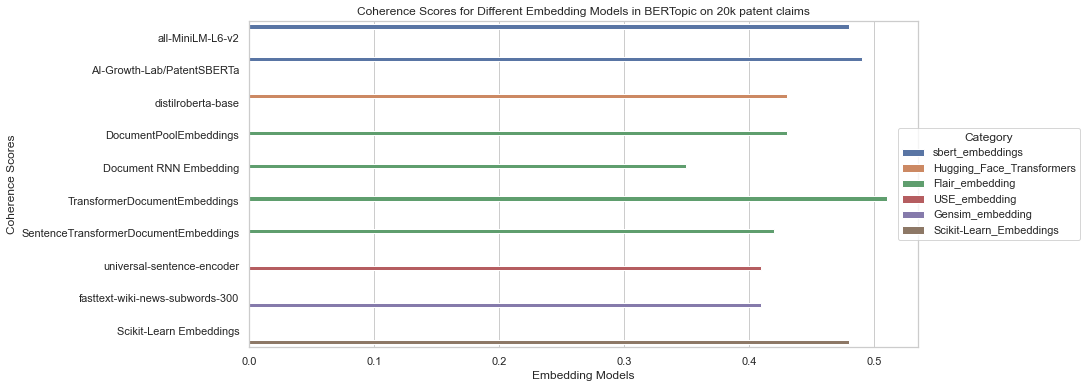

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert embedding_scores to a DataFrame
embedding_scores = pd.DataFrame([
    ['all-MiniLM-L6-v2', 0.48, 'sbert_embeddings'],
    ['AI-Growth-Lab/PatentSBERTa', 0.49, 'sbert_embeddings'],
    ['distilroberta-base', 0.43, 'Hugging_Face_Transformers'],
    ['DocumentPoolEmbeddings', 0.43, 'Flair_embedding'],
    ['Document RNN Embedding', 0.35, 'Flair_embedding'],
    ['TransformerDocumentEmbeddings', 0.51, 'Flair_embedding'],
    ['SentenceTransformerDocumentEmbeddings', 0.42, 'Flair_embedding'],
    ['universal-sentence-encoder', 0.41, 'USE_embedding'],
    ['fasttext-wiki-news-subwords-300', 0.41, 'Gensim_embedding'],
    ['Scikit-Learn Embeddings', 0.48, 'Scikit-Learn_Embeddings']
], columns=['Embedding Models', 'Coherence Scores', 'Category'])

sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Coherence Scores', y='Embedding Models', hue='Category', data=embedding_scores, orient='h')
ax.set_xlabel('Embedding Models')
ax.set_ylabel('Coherence Scores')
ax.set_title('Coherence Scores for Different Embedding Models in BERTopic on 20k patent claims')
plt.legend(title='Category', loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()



In [44]:
######################## Dimention reduction

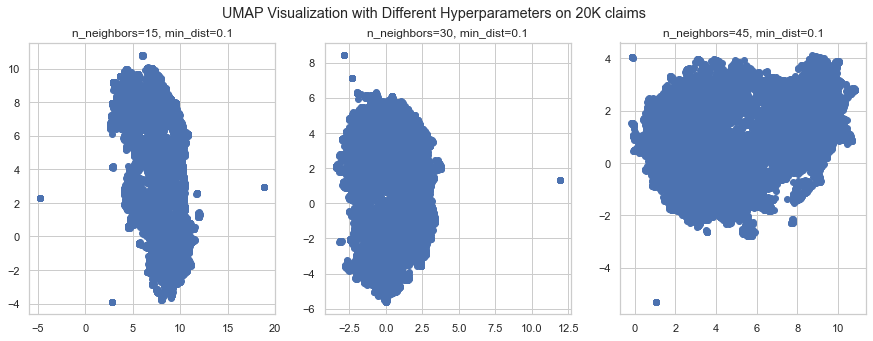

In [66]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from umap import UMAP
import matplotlib.pyplot as plt

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_claim_20K['Lemmatized-Claim'])

# UMAP visualization with different hyperparameters
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("UMAP Visualization with Different Hyperparameters on 20K claims")

n_neighbors = [15, 30, 45]
min_dist = [0.1]

for i, nn in enumerate(n_neighbors):
    for j, md in enumerate(min_dist):
        umap = UMAP(n_neighbors=nn, min_dist=md)
        emb = umap.fit_transform(tfidf.toarray())
        axs[i].scatter(emb[:, 0], emb[:, 1])
        axs[i].set_title(f"n_neighbors={nn}, min_dist={md}")

#plt.savefig('umap.png', dpi=300)
plt.show()


In [ ]:
#n_neighbors = 15

In [58]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=15, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-23 10:11:44,098 - BERTopic - Transformed documents to Embeddings
2023-03-23 10:12:08,524 - BERTopic - Reduced dimensionality
2023-03-23 10:12:11,941 - BERTopic - Clustered reduced embeddings


In [59]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.488386279025878


In [ ]:
#n_neighbors = 30

In [60]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=30, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-23 14:33:01,220 - BERTopic - Transformed documents to Embeddings
2023-03-23 14:33:37,838 - BERTopic - Reduced dimensionality
2023-03-23 14:33:43,657 - BERTopic - Clustered reduced embeddings


In [61]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4976647422539242


In [ ]:
#n_neighbors = 30

In [62]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=15, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-23 15:30:09,535 - BERTopic - Transformed documents to Embeddings
2023-03-23 15:30:51,389 - BERTopic - Reduced dimensionality
2023-03-23 15:30:54,662 - BERTopic - Clustered reduced embeddings


In [63]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5231920901923311


In [64]:
#n_components = 5

In [65]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=5, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-23 16:47:16,698 - BERTopic - Transformed documents to Embeddings
2023-03-23 16:47:45,323 - BERTopic - Reduced dimensionality
2023-03-23 16:47:48,116 - BERTopic - Clustered reduced embeddings


In [67]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5122339903526965


In [68]:
#n_components = 10

In [69]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=15, 
                        min_samples=2, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-23 17:59:02,503 - BERTopic - Transformed documents to Embeddings
2023-03-23 17:59:36,303 - BERTopic - Reduced dimensionality
2023-03-23 17:59:39,622 - BERTopic - Clustered reduced embeddings


In [70]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5244085036241484


In [75]:
#dimention reduction PCA, t-sne, umap, svd on the 20k patent claim

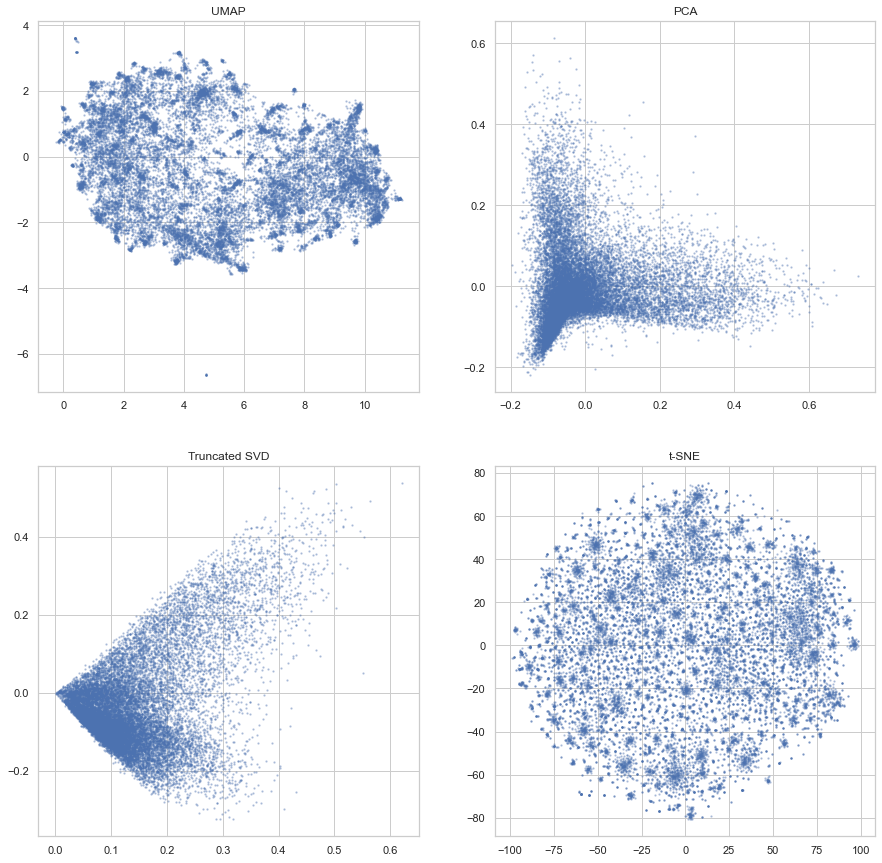

In [78]:
import pandas as pd
import umap
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df_claim_20K['Lemmatized-Claim'])

# Dimensionality reduction with UMAP
reducer_umap = umap.UMAP(n_neighbors=45, n_components=2, random_state=42)
umap_embeddings = reducer_umap.fit_transform(tfidf)

# Dimensionality reduction with PCA
reducer_pca = PCA(n_components=2, random_state=42)
pca_embeddings = reducer_pca.fit_transform(tfidf.toarray())

# Dimensionality reduction with Truncated SVD
reducer_svd = TruncatedSVD(n_components=2, random_state=42)
svd_embeddings = reducer_svd.fit_transform(tfidf)

# Dimensionality reduction with t-SNE
reducer_tsne = TSNE(n_components=2, random_state=42)
tsne_embeddings = reducer_tsne.fit_transform(tfidf.toarray())

# Visualization of the results
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# UMAP plot
axs[0, 0].scatter(umap_embeddings[:,0], umap_embeddings[:,1], s=2, alpha=0.3)
axs[0, 0].set_title('UMAP')

# PCA plot
axs[0, 1].scatter(pca_embeddings[:,0], pca_embeddings[:,1], s=2, alpha=0.3)
axs[0, 1].set_title('PCA')

# Truncated SVD plot
axs[1, 0].scatter(svd_embeddings[:,0], svd_embeddings[:,1], s=2, alpha=0.3)
axs[1, 0].set_title('Truncated SVD')

# t-SNE plot
axs[1, 1].scatter(tsne_embeddings[:,0], tsne_embeddings[:,1], s=2, alpha=0.3)
axs[1, 1].set_title('t-SNE')

#plt.savefig('umap.png', dpi=400)

plt.show()

In [81]:
#clustering

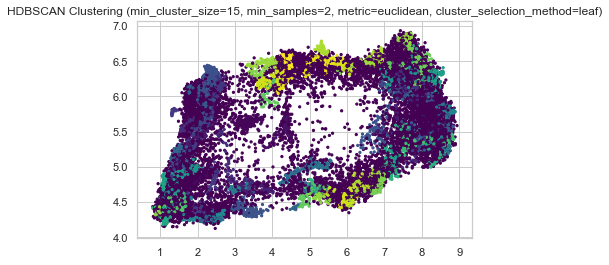

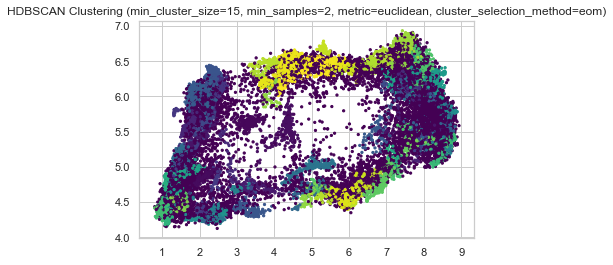

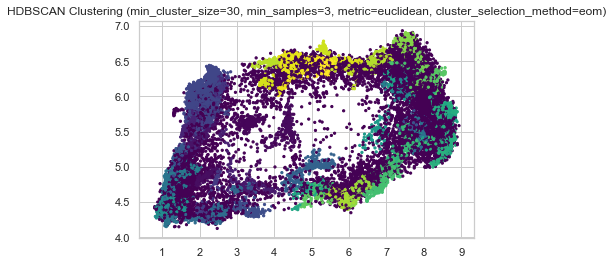

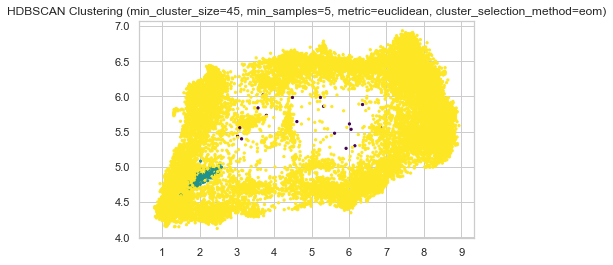

In [85]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
import hdbscan
import matplotlib.pyplot as plt

# Load SentenceTransformer model
sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

# Transform your dataset
embeddings = sentence_model.encode(df_claim_20K['Lemmatized-Claim'])

# Initialize UMAP model
umap_model = UMAP(n_neighbors=45, n_components=10, min_dist=0.1, metric='cosine', random_state=100)

# Fit UMAP model to embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

# Define hyperparameters to test
hdbscan_params = [{'min_cluster_size': 15, 'min_samples': 2, 'metric': 'euclidean', 'cluster_selection_method': 'leaf'},
                  {'min_cluster_size': 15, 'min_samples': 2, 'metric': 'euclidean', 'cluster_selection_method': 'eom'},
                  {'min_cluster_size': 30, 'min_samples': 3, 'metric': 'euclidean', 'cluster_selection_method': 'eom'},
                  {'min_cluster_size': 45, 'min_samples': 5, 'metric': 'euclidean', 'cluster_selection_method': 'eom'}]

# Iterate over the hyperparameters and fit the HDBSCAN model to the UMAP embeddings
for params in hdbscan_params:
    hdbscan_model = hdbscan.HDBSCAN(**params)
    hdbscan_labels = hdbscan_model.fit_predict(umap_embeddings)
    
    # Visualize the clustering
    plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=hdbscan_labels, cmap='viridis', s=5)
    plt.title(f"HDBSCAN Clustering (min_cluster_size={params['min_cluster_size']}, min_samples={params['min_samples']}, metric={params['metric']}, cluster_selection_method={params['cluster_selection_method']})")
    #plt.savefig('umap.png', dpi=400)
    plt.show()


In [86]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=30, 
                        min_samples=3, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
#ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       #ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-24 20:17:35,320 - BERTopic - Transformed documents to Embeddings
2023-03-24 20:18:09,029 - BERTopic - Reduced dimensionality
2023-03-24 20:18:11,556 - BERTopic - Clustered reduced embeddings


In [87]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.561675663201645


In [88]:
#kmeans

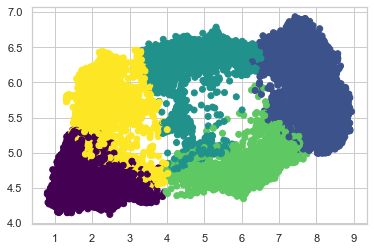

In [89]:
# Load libraries
import pandas as pd
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load SentenceTransformer model
sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


# Generate sentence embeddings
embeddings = sentence_model.encode(df_claim_20K['Lemmatized-Claim'])

# Initialize UMAP model
umap_model = umap.UMAP(n_neighbors=45, n_components=10, min_dist=0.1, metric='cosine', random_state=100)

# Fit UMAP model to embeddings
umap_embeddings = umap_model.fit_transform(embeddings)

# Initialize K-means model
kmeans_model = KMeans(n_clusters=5, random_state=100)

# Fit K-means model to UMAP embeddings
kmeans_model.fit(umap_embeddings)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Visualize clusters using first two dimensions of UMAP embeddings
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=cluster_labels, cmap='viridis')
plt.show()

In [90]:
#Hyperparameter for Diversifying Topic Representation

In [91]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=30, 
                        min_samples=3, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-25 08:19:41,454 - BERTopic - Transformed documents to Embeddings
2023-03-25 08:20:16,926 - BERTopic - Reduced dimensionality
2023-03-25 08:20:21,201 - BERTopic - Clustered reduced embeddings


In [92]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5203805602371658


In [93]:
# set CountVetorizer, c-TF-IDF
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')



# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=30, 
                        min_samples=3, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.5)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)

# Initialize and fit BERTopic with fine-tuned hyperparameters
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None,
                       verbose=True)

topics, probabilities = topic_model.fit_transform(df_claim_20K['Lemmatized-Claim'])

Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-25 09:14:52,299 - BERTopic - Transformed documents to Embeddings
2023-03-25 09:15:26,859 - BERTopic - Reduced dimensionality
2023-03-25 09:15:32,838 - BERTopic - Clustered reduced embeddings


In [94]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = topic_model._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in topic_model.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.561675663201645


In [ ]:
# diversity

In [104]:
import pandas as pd
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer


# Define hyperparameters
diversity = 0.8


sentence_model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')


# Initiate UMAP
# Adjust UMAP hyperparameters
umap_model = UMAP(n_neighbors=45, 
                  n_components=10, 
                  min_dist=0.1, 
                  metric='cosine', 
                  random_state=100)

# Adjust HDBSCAN hyperparameters
hdbscan_model = HDBSCAN(min_cluster_size=30, 
                        min_samples=3, 
                        metric='euclidean', 
                        cluster_selection_method='leaf', 
                        prediction_data=True)

# Adjust CountVectorizer hyperparameters
vectorizer_model = CountVectorizer(ngram_range=(1, 3), 
                                   min_df=10, 
                                   max_df=0.4)

# Adjust ClassTfidfTransformer hyperparameters
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=False)



# Create BERTopic model with diversity turned on
model_with_diversity = BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,ctfidf_model=ctfidf_model, calculate_probabilities=True, diversity=diversity, verbose=True)
topics_with_diversity, probs_with_diversity = model_with_diversity.fit_transform(df_claim_20K['Lemmatized-Claim'])

# Create BERTopic model with diversity turned off
model_without_diversity =BERTopic(umap_model=umap_model, embedding_model=sentence_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,ctfidf_model=ctfidf_model, calculate_probabilities=True, diversity=None, verbose=True)
topics_without_diversity, probs_without_diversity = model_without_diversity.fit_transform(df_claim_20K['Lemmatized-Claim'])


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-25 14:20:29,537 - BERTopic - Transformed documents to Embeddings
2023-03-25 14:21:06,789 - BERTopic - Reduced dimensionality
2023-03-25 14:21:19,095 - BERTopic - Clustered reduced embeddings


Batches:   0%|          | 0/625 [00:00<?, ?it/s]

2023-03-25 15:15:15,296 - BERTopic - Transformed documents to Embeddings
2023-03-25 15:15:51,197 - BERTopic - Reduced dimensionality
2023-03-25 15:16:00,108 - BERTopic - Clustered reduced embeddings


In [110]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = model_with_diversity._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = model_with_diversity.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model_with_diversity.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.4376001287996895


In [111]:
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

documents = pd.DataFrame({"Document": df_claim_20K['Lemmatized-Claim'],
                          "ID": range(len(df_claim_20K['Lemmatized-Claim'])),
                          "Topic": topics})
documents_per_topic = documents.groupby(['Topic'], as_index=False).agg({'Document': ' '.join})
cleaned_docs = model_without_diversity._preprocess_text(documents_per_topic.Document.values)

# Extract vectorizer and analyzer from BERTopic
vectorizer = model_without_diversity.vectorizer_model
analyzer = vectorizer.build_analyzer()

# Extract features for Topic Coherence evaluation
words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in cleaned_docs]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]
topic_words = [[words for words, _ in model_without_diversity.get_topic(topic)] 
               for topic in range(len(set(topics))-1)]

# Evaluate
coherence_model = CoherenceModel(topics=topic_words, 
                                 texts=tokens, 
                                 corpus=corpus,
                                 dictionary=dictionary, 
                                 coherence='c_v')
coherence_CV= coherence_model.get_coherence()
print("C_V is: ", coherence_CV)

C_V is:  0.5203805602371658


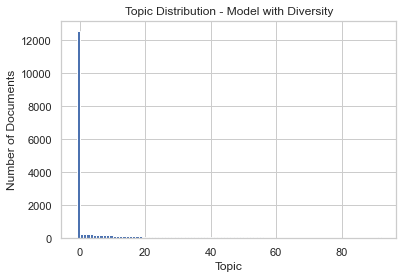

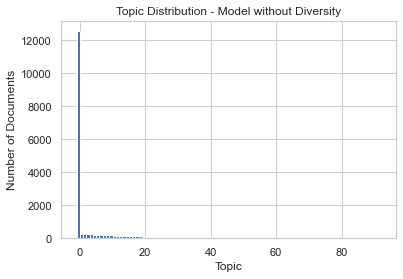

In [106]:
import matplotlib.pyplot as plt

# Get number of clusters from HDBSCAN model
n_clusters = model_with_diversity.hdbscan_model.labels_.max() + 1

# Plot topic distribution for model with diversity
plt.hist(topics_with_diversity, bins=n_clusters)
plt.title("Topic Distribution - Model with Diversity")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.show()

# Get number of clusters from HDBSCAN model
n_clusters = model_without_diversity.hdbscan_model.labels_.max() + 1

# Plot topic distribution for model without diversity
plt.hist(topics_without_diversity, bins=n_clusters)
plt.title("Topic Distribution - Model without Diversity")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.show()


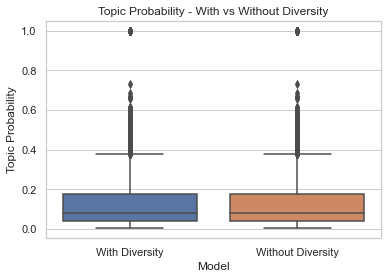

In [112]:
import pandas as pd
import seaborn as sns

# Combine probabilities into a single DataFrame
probs = pd.DataFrame({
    "With Diversity": probs_with_diversity.max(axis=1),
    "Without Diversity": probs_without_diversity.max(axis=1)
})

# Plot box plots of topic probabilities
sns.boxplot(data=probs)
plt.title("Topic Probability - With vs Without Diversity")
plt.xlabel("Model")
plt.ylabel("Topic Probability")
plt.show()